In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [256]:
# Accessing data
data = pd.read_csv('./Sterling E-Commerce Data.csv')

data.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [257]:
# droping umimportant columns
drop_cols = ['Cust Id','Ref Num','Zip','Total','User Name', 'Item Id']
data = data.drop(columns = drop_cols)

data.head()

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Order Id,Payment Method,Place Name,Region,State,Qty Ordered
0,Health & Sports,Bode,Humboldt,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,100547952.0,Easypay_MA,Bode,Midwest,IA,3
1,Men's Fashion,Belleville,St. Clair,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
2,Men's Fashion,Belleville,St. Clair,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
3,Computing,Young America,Carver,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,100551079.0,Payaxis,Young America,Midwest,MN,2
4,Entertainment,Young America,Carver,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,100551618.0,Payaxis,Young America,Midwest,MN,2


In [258]:
# describtive statistics for categorical columns
data.describe(exclude=[int, float])

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Region,State
count,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083
unique,15,15668,2518,11629,365,63610,2,13,15668,4,49
top,Mobiles & Tablets,Dekalb,Jefferson,11/30/2005,12/20/2021 0:00,"Gonzalez, Joel",M,cod,Dekalb,South,TX
freq,60954,2525,3510,2536,13522,2524,144295,101750,2525,103482,17510


In [259]:
# Converting string dates to datetime format
data['Customer Since'] = pd.to_datetime(data['Customer Since'])
data['Date of Order'] = pd.to_datetime(data['Date of Order'])

data.head()

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Order Id,Payment Method,Place Name,Region,State,Qty Ordered
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,"Renaud, Maudie",F,100547952.0,Easypay_MA,Bode,Midwest,IA,3
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
3,Computing,Young America,Carver,2013-09-15,2022-08-18,"Doiron, Latrina",F,100551079.0,Payaxis,Young America,Midwest,MN,2
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,"Doiron, Latrina",F,100551618.0,Payaxis,Young America,Midwest,MN,2


In [260]:
data.shape

(283083, 13)

In [261]:
from sklearn.preprocessing import LabelEncoder

# converting categorical features to numerical values
label_encoder = LabelEncoder()

data2 = data.copy() #creating a copy of the main dataframe

for column in data2.select_dtypes(include=['object']).columns:
    data2[column] = label_encoder.fit_transform(data2[column])


data2.head()

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Order Id,Payment Method,Place Name,Region,State,Qty Ordered
0,5,1293,1079,2008-02-11,2022-08-07,47912,0,100547952.0,1,1293,0,10,3
1,8,932,2127,2005-06-23,2022-08-08,52595,0,100548328.0,1,932,0,12,2
2,8,932,2127,2005-06-23,2022-08-08,52595,0,100548328.0,1,932,0,12,2
3,3,15612,386,2013-09-15,2022-08-18,15557,0,100551079.0,2,15612,0,21,2
4,4,15612,386,2013-09-15,2022-08-20,15557,0,100551618.0,2,15612,0,21,2


In [281]:
data = data.dropna()
data.isna().sum()

Category          0
City              0
County            0
Customer Since    0
Date of Order     0
Month of Order    0
Full Name         0
Gender            0
Order Id          0
Payment Method    0
Place Name        0
Region            0
State             0
Qty Ordered       0
dtype: int64

### Exploratory Data Analysis
#### Univariate

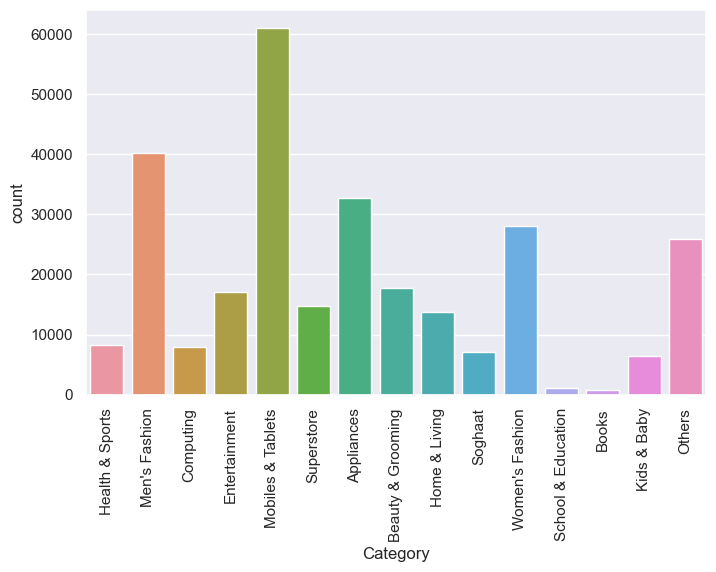

In [262]:
plt.figure(figsize=(8, 5))
plt.xticks(rotation=90)

sns.countplot(data=data, x='Category');

#### Observation
- Mobile & Tablets is the most category of product in stering e-commerce data

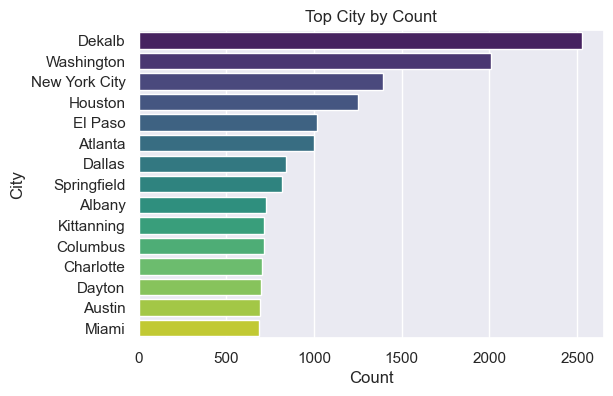

In [263]:
# Group by 'City' and count occurrences
grouped = data.groupby('City').size().reset_index(name='Count')

# Sort by count in descending order and take top 20
top_20 = grouped.sort_values(by='Count', ascending=False).head(15)

# Create a countplot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.barplot(data=top_20, x='Count', y='City', palette='viridis')

plt.title("Top City by Count")
plt.xlabel("Count")
plt.ylabel("City")

plt.show()

- Top cities where customers are ordering from

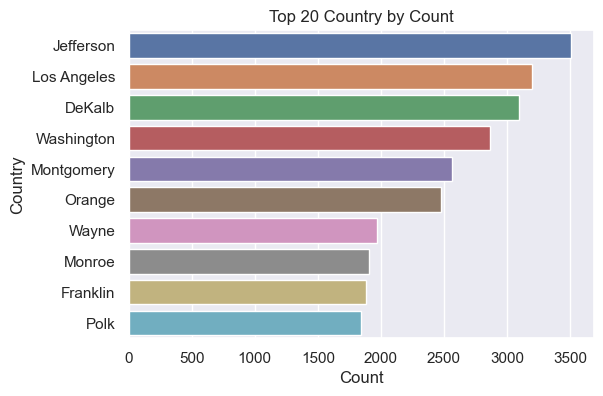

In [264]:
# Group by 'City' and count occurrences
country_group = data.groupby('County').size().reset_index(name='Count')

# Sort by count in descending order and take top most 10
top_countries = country_group.sort_values(by='Count', ascending=False).head(10)

# Create a countplot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.barplot(data=top_countries, x='Count', y='County')

plt.title("Top 20 Country by Count")
plt.xlabel("Count")
plt.ylabel("Country")

plt.show()

- Top countries where customers are ordering from

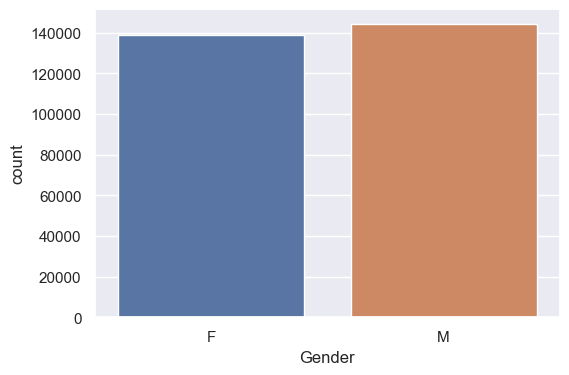

In [265]:
# Create a count plot using Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender');

- There are almost same number of males and females

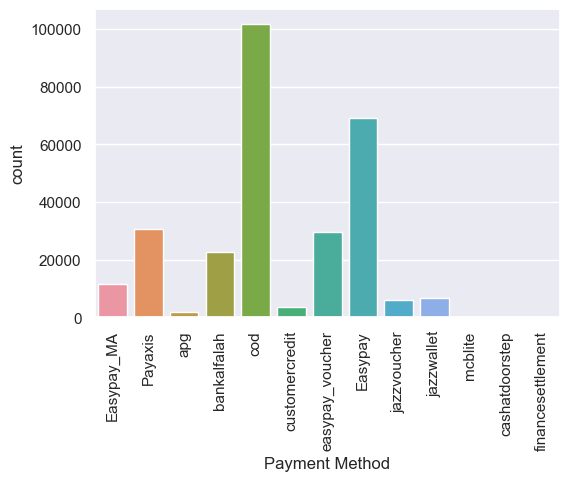

In [266]:
# Create a count plot using Seaborn
plt.figure(figsize=(6, 4))
plt.xticks(rotation=90)
sns.countplot(data=data, x='Payment Method');

#### Observations
- There are more Customers using the COD payment platform and few Customers using the Apg. 
- And no Customers uses the Mcblite, Cashatdoorstep, financesettlement

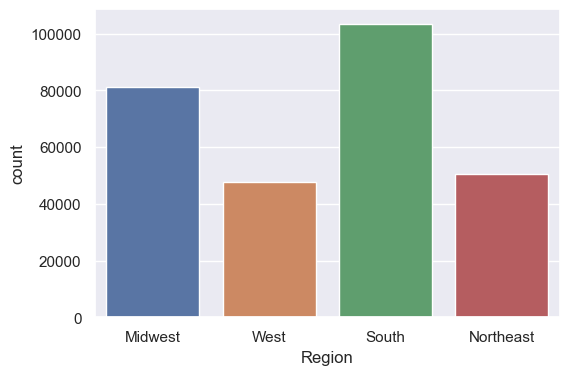

In [267]:
# Create a count plot using Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Region');

- There are more customers ordering from the South Region than other regions

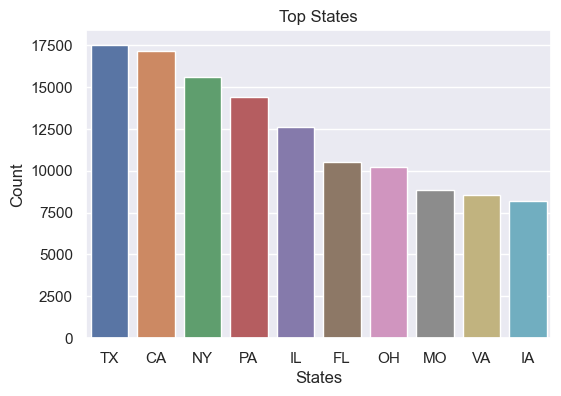

In [268]:
# Calculate the frequency of each category
state_count = data['State'].value_counts()

# Select the top N states
top_state = state_count.head(10).index

# Create a countplot for the top categories using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=data[data['State'].isin(top_state)], x='State', order=top_state)

plt.title("Top States")
plt.xlabel("States")
plt.ylabel("Count")

plt.show()


- Visualization of the top most 10 states

In [269]:
# Extract the month from the datetime column
data['Month of Order'] = data['Date of Order'].dt.strftime('%B')

# Find the index position of the 'Date' column
date_column_index = data.columns.get_loc('Date of Order')

# Insert the 'Month' column right after the 'Date' column
data.insert(date_column_index + 1, 'Month of Order', data.pop('Month of Order'))

data.head()

,Category,City,County,Customer Since,Date of Order,Month of Order,Full Name,Gender,Order Id,Payment Method,Place Name,Region,State,Qty Ordered
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,August,"Renaud, Maudie",F,100547952.0,Easypay_MA,Bode,Midwest,IA,3
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,August,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,August,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
3,Computing,Young America,Carver,2013-09-15,2022-08-18,August,"Doiron, Latrina",F,100551079.0,Payaxis,Young America,Midwest,MN,2
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,August,"Doiron, Latrina",F,100551618.0,Payaxis,Young America,Midwest,MN,2


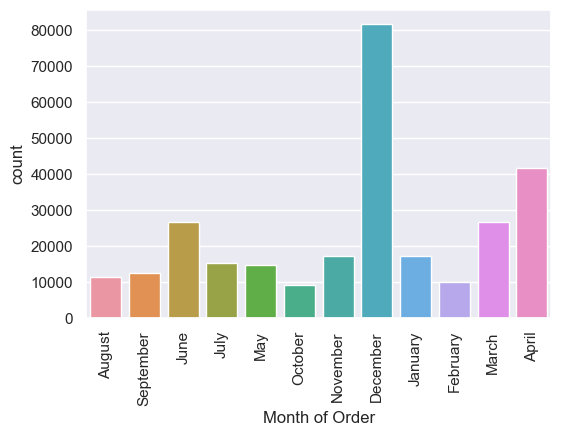

In [270]:
# Create a count plot using Seaborn
plt.figure(figsize=(6, 4))

plt.xticks(rotation=90)
sns.countplot(data=data, x='Month of Order');

### Observation
- The feastive months have the most ordering periods. December and April

### Bivariate Analysis

In [271]:
data.head()

,Category,City,County,Customer Since,Date of Order,Month of Order,Full Name,Gender,Order Id,Payment Method,Place Name,Region,State,Qty Ordered
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,August,"Renaud, Maudie",F,100547952.0,Easypay_MA,Bode,Midwest,IA,3
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,August,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,August,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
3,Computing,Young America,Carver,2013-09-15,2022-08-18,August,"Doiron, Latrina",F,100551079.0,Payaxis,Young America,Midwest,MN,2
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,August,"Doiron, Latrina",F,100551618.0,Payaxis,Young America,Midwest,MN,2


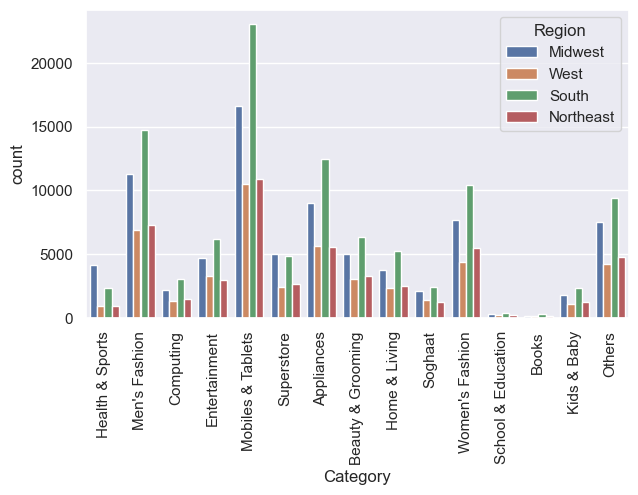

In [272]:
# visualizing the category that sells in which region most
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)

sns.countplot(data=data, x='Category', hue= 'Region');

### Observations
- The top selling products are the mobile,men's fashion,appliances, women fashion and others
- All region are more of the mobile and tablet product
- There are more customers from the South region buying the mobile and tablets
- There are less customers from south region buying the health and sports, kids and Baby, schools and education, and books product
- The south region buys mostly in all products followed by the Mideast
- The West and Norteast are mostly buying the same quantity across the products

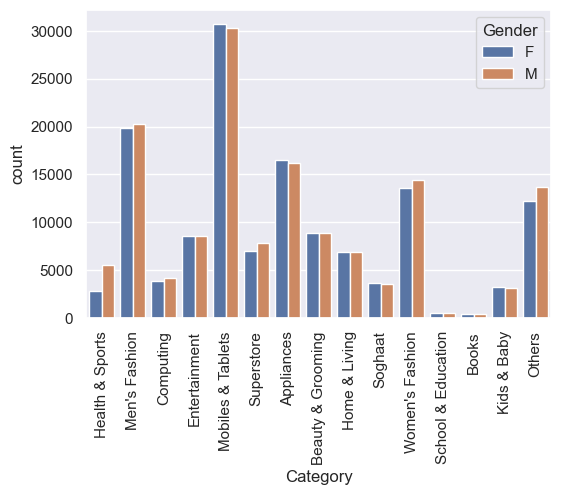

In [273]:
# visaulizing which eacg product the genders order most
plt.figure(figsize=(6, 4))
plt.xticks(rotation=90)

sns.countplot(data=data, x='Category', hue= 'Gender');

### Observations
- Few percentage of the female buys the mobile and tablet than male.
- Thw male Gender busy more of the Health and sports than the female
- The choices of the famale and male on the Entertainmnet and Beauty & clothings products are mostly on the same level
- Very few genders are instrested in the Books and education products
- Men's fashion sales more for the male than the female

#### Multivariate Analysis

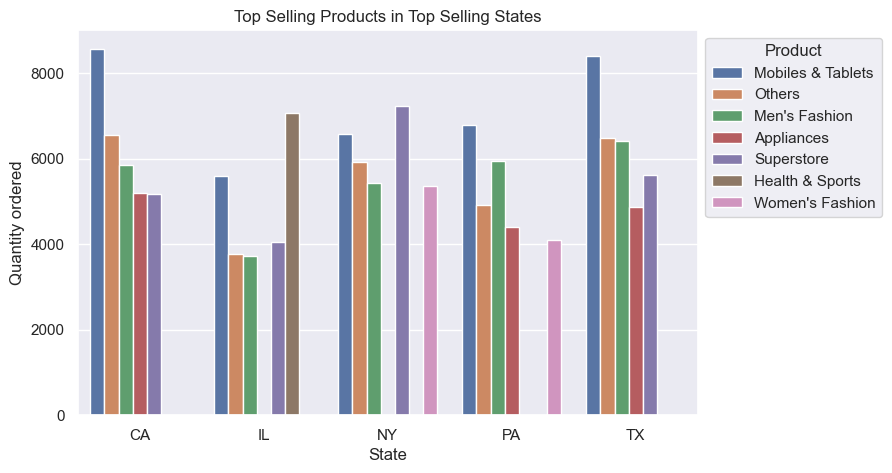

In [274]:
# Calculate total quantity orderfor each product in each state
grouped = data.groupby(['State', 'Category'])['Qty Ordered'].sum().reset_index()

# Select the top N states based on total quantity sold
top_states = grouped.groupby('State')['Qty Ordered'].sum().nlargest(5).index

# Select the top M products for each top state
top_products = grouped[grouped['State'].isin(top_states)].groupby('State').apply(
    lambda x: x.nlargest(5, 'Qty Ordered')
).reset_index(drop=True)

# Create a bar plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x='State', y='Qty Ordered', hue='Category')

plt.title("Top Selling Products in Top Selling States")
plt.xlabel("State")
plt.ylabel("Quantity ordered")
plt.legend(title="Product")

# Move legend outside the plot and place it in a straight line
plt.legend(title="Product", loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.show()


### Observations
- Mobile & Tablets are ordered most from CA, PA and TX for each state
- Health and Sports are only ordered mostly from IL than any other States and didnt appear to be ordered from other states too
- Others and Men's fashion are ordered most from TX
- Appliances are ordered mostly from CA and appeared in all states expect for IL and NY
- Women's fashion are ordered most from NY, PA and didnt appear in any other state
- NY order superstore the most and appeared in all state expect PA for the 5 most ordering state
- Superstore appeared in CA, IL,NY,and TX for the 5 most states and ordered mostly from


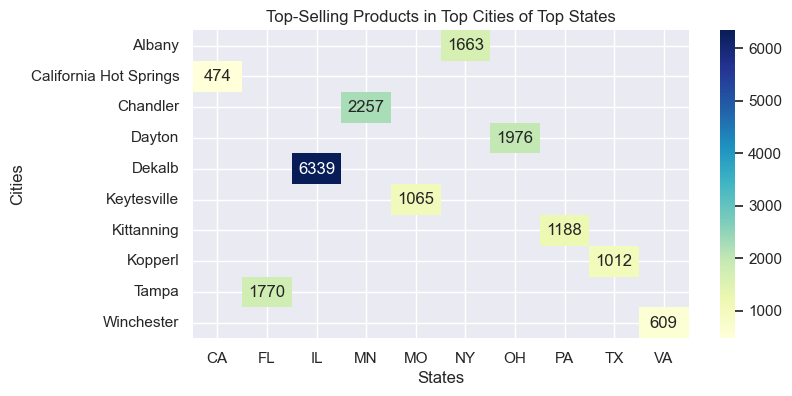

In [275]:
# Calculate total quantity sold for each product in each city and state
product_city_state_sales = data.groupby(['Category', 'State', 'City'])['Qty Ordered'].sum().reset_index()

# Select the top 10 states based on total sales
top_states = product_city_state_sales.groupby('State')['Qty Ordered'].sum().nlargest(10).index

# Filter data for top 10 states
top_states_data = product_city_state_sales[product_city_state_sales['State'].isin(top_states)]

# For each top state, find the top-selling product in each city
def top_selling_products(group):
    return group.nlargest(1, 'Qty Ordered')

top_selling_products = top_states_data.groupby('State', as_index=False).apply(top_selling_products)

# Pivot the data for heatmap
heatmap_data = top_selling_products.pivot_table(index='City', columns='State', values='Qty Ordered')

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")

plt.title("Top-Selling Products in Top Cities of Top States")
plt.xlabel("States")
plt.ylabel("Cities")

plt.show()


### Observations:
- Dekalb in IL has the highest total quantity order for a product
- Califonia Hot Spring in CA has the lowest total quantity order for a product

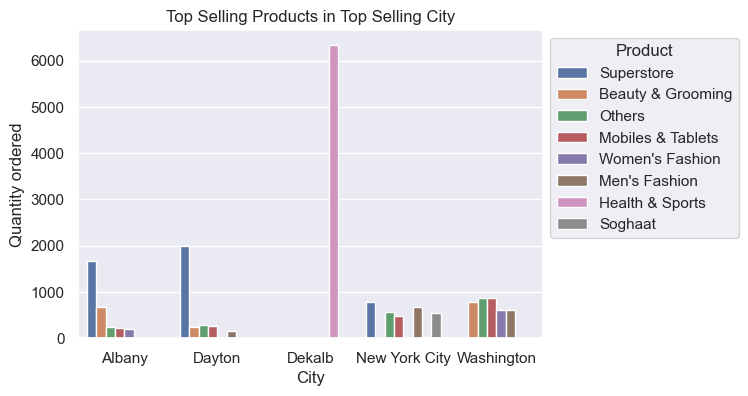

In [276]:
# checking the most ordering cities and which type of product

# Calculate top quantity order for each product in top cities
city_grouped = data.groupby(['City', 'Category'])['Qty Ordered'].sum().reset_index()

# Select the top N states based on total quantity sold
top_cities = city_grouped.groupby('City')['Qty Ordered'].sum().nlargest(5).index

# Select the top M products for each top city
top_city_products = city_grouped[city_grouped['City'].isin(top_cities)].groupby('City').apply(
    lambda x: x.nlargest(5, 'Qty Ordered')
).reset_index(drop=True)

# Create a bar plot using seaborn
plt.figure(figsize=(6, 4))

sns.barplot(data=top_city_products, x='City', y='Qty Ordered', hue='Category')

plt.title("Top Selling Products in Top Selling City")
plt.xlabel("City")
plt.ylabel("Quantity ordered")
plt.legend(title="Product")

# Move legend outside the plot and place it in a straight line
plt.legend(title="Product", loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.show()


### Observations: 
##### in the top cities
- Health and Sports is the most selling product in the Dekalb City with little or no order for other product
- Albany is has more orders for Superstore product and with orders for Beauty & Grooming, others, Mobile & Tablet and Women's fashion
- Dayton orders superstore most and have orders for the other product too
- Washington are ordering the products in thier numbers. mobile & tablet sells morre in washington and New York city

In [277]:
data.head()

,Category,City,County,Customer Since,Date of Order,Month of Order,Full Name,Gender,Order Id,Payment Method,Place Name,Region,State,Qty Ordered
0,Health & Sports,Bode,Humboldt,2008-02-11,2022-08-07,August,"Renaud, Maudie",F,100547952.0,Easypay_MA,Bode,Midwest,IA,3
1,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,August,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
2,Men's Fashion,Belleville,St. Clair,2005-06-23,2022-08-08,August,"Shimp, Mariela",F,100548328.0,Easypay_MA,Belleville,Midwest,IL,2
3,Computing,Young America,Carver,2013-09-15,2022-08-18,August,"Doiron, Latrina",F,100551079.0,Payaxis,Young America,Midwest,MN,2
4,Entertainment,Young America,Carver,2013-09-15,2022-08-20,August,"Doiron, Latrina",F,100551618.0,Payaxis,Young America,Midwest,MN,2


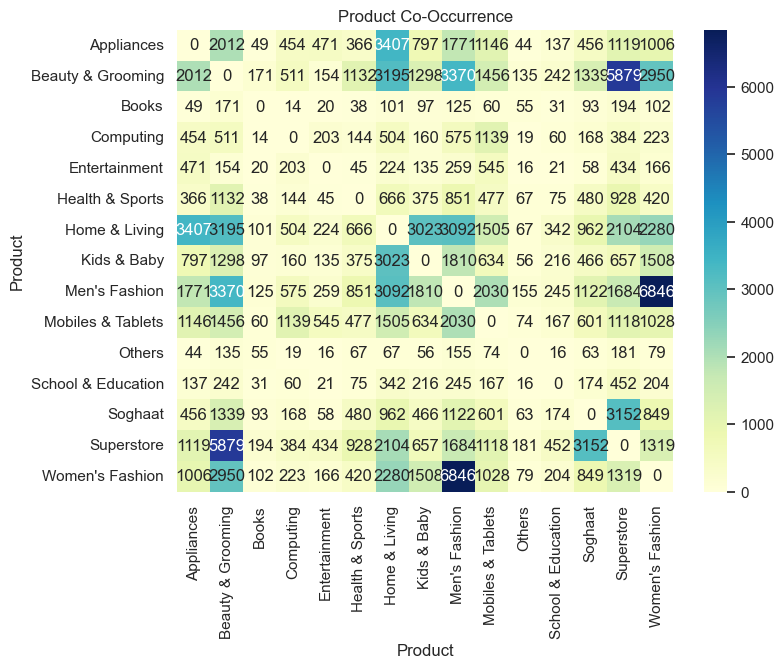

In [291]:
# Displaying product are mostly sold together

# Pivot the data to get binary representation of product occurrences in each order
pivot_data = data.pivot_table(index='Order Id', columns='Category', aggfunc='size', fill_value=0)

# Calculate the co-occurrence matrix
co_occurrence_matrix = pivot_data.T.dot(pivot_data)

# Set diagonal values to 0 as we're not interested in self-co-occurrence
co_occurrence_matrix.values[[i for i in range(len(co_occurrence_matrix))], [i for i in range(len(co_occurrence_matrix))]] = 0

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, cmap="YlGnBu", annot=True, fmt="g")

plt.title("Product Co-Occurrence")
plt.xlabel("Product")
plt.ylabel("Product")

plt.show()


### Observations:
- There is a relationship between Superstore ans Beaty & Grooming
- women's fashion ans men's fashion have a close relationship
